# Time Series

- Converting between string and datetime:
    - datetime -> string: `datetime_object.strftime('%Y-%m-%d')` 
    - string -> datetime: `datetime.strptime(string_object,'%Y-%m-%d')`
    - __f->format;p->parse__
    - A very critical way of parsing strings:
    ```python
        from dateutil.parser import parse
        parse(string, dayfirst=False)
    ```
- Selection
    - for convenience, you can pass a string that is interpretable as a date
- Creat index
    - `index = pd.date_range(start='1/1/2000',periods=1000)`
    - `pd.date_range('2012-04-01','2012-06-01')`
    - `pd.date_range(end='1/1/2000',periods=100,freq='1h30min')`
- Detect duplicate dates: `dataframe.index.is_unique`, then `dataframe.groupby(level=0).count()` (level=0 means grouping based on index.
- Shifting data: `data.shift(int,freq='')`. if `freq` is assigned, then the index will be shifted; if you just want to keep index unmodified, just leave it alone.
- Resample:
    - DownResampling: 
        - `.resample('5min',close='left').sum()`. the resample method is similar to `groupby` method
        - `.resample('5min').ohlc()`
    - Upresampling:
        - methods of filling the `NaN` are required.
        - `.resample('D').asfreq()` will leave the `NaN` there
        - `.resample('D').ffill(limit=)` or `.resample('D').bfill(limit=)`
- Rolling window method
    - `.rolling(250,min_periods=10).mean()`. `rolling()` behaves like `groupby()` and `resample()`. The `min_periods=` is used to handling NaN, because `rolling()` require all the values to be non-NA by default
    - `expanding()`

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

In [3]:
from datetime import datetime,timedelta
from dateutil.parser import parse

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2022, 9, 2, 23, 14, 30, 248503)

In [5]:
print(now.year,now.month,now.day,now.hour,now.minute,now.second)

2022 9 2 23 14 30


In [7]:
delta = datetime(2011,1,7)-datetime(2008,6,24,8,15)
delta

datetime.timedelta(days=926, seconds=56700)

In [9]:
start = datetime(2011,1,7)
start+delta

datetime.datetime(2013, 7, 21, 15, 45)

In [10]:
stamp = datetime(2011,1,3)

In [11]:
str(stamp)

'2011-01-03 00:00:00'

In [12]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [13]:
value = '2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [17]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [18]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),datetime(2011, 1, 7), datetime(2011, 1, 8),datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [19]:
ts = pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02    1.150104
2011-01-05    0.063467
2011-01-07    1.943939
2011-01-08   -1.279484
2011-01-10    1.735032
2011-01-12    0.914903
dtype: float64

In [20]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [21]:
ts.index[0]

Timestamp('2011-01-02 00:00:00')

In [22]:
ts['2011.1.2']

1.1501037935437817

In [23]:
longer_ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01    1.747359
2000-01-02   -0.356970
2000-01-03   -0.960285
2000-01-04    0.065411
2000-01-05    0.970784
                ...   
2002-09-22   -1.675767
2002-09-23   -0.692716
2002-09-24   -0.199651
2002-09-25    0.633085
2002-09-26    0.003658
Freq: D, Length: 1000, dtype: float64

In [24]:
longer_ts['2001']

2001-01-01   -1.689046
2001-01-02   -1.096155
2001-01-03    0.268797
2001-01-04   -0.371962
2001-01-05    0.233771
                ...   
2001-12-27    1.388988
2001-12-28   -0.122538
2001-12-29   -0.262755
2001-12-30    0.537314
2001-12-31   -1.598834
Freq: D, Length: 365, dtype: float64

In [27]:
dates = pd.date_range('1/1/2000',periods=100,freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100,4),columns=['Colorado','Texas','New York','Ohio'],index=dates)
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-1.084737,0.622573,-0.599712,1.502715
2000-01-12,0.812078,0.857492,-0.208088,-0.098933
2000-01-19,1.387335,-0.506559,-0.209377,-0.763051
2000-01-26,1.284890,0.000615,0.841933,0.220976
2000-02-02,0.655230,-0.353228,1.207945,-1.897316
...,...,...,...,...
2001-10-31,0.907349,0.539807,-0.081055,0.145200
2001-11-07,-0.914432,-0.443119,-0.482773,0.554333
2001-11-14,0.229857,0.872831,1.284765,0.199339
2001-11-21,-0.298982,0.387492,0.919324,0.915744


In [31]:
dates = pd.DatetimeIndex([
    '1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'
])
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [32]:
dup_ts = pd.DataFrame(np.arange(5),index=dates)
dup_ts

,0
2000-01-01,0
2000-01-02,1
2000-01-02,2
2000-01-02,3
2000-01-03,4


In [35]:
dup_ts.index.is_unique

False

In [36]:
dup_ts.groupby(level=0).count()

,0
2000-01-01,1
2000-01-02,3
2000-01-03,1


In [37]:
ts

2011-01-02    1.150104
2011-01-05    0.063467
2011-01-07    1.943939
2011-01-08   -1.279484
2011-01-10    1.735032
2011-01-12    0.914903
dtype: float64

In [38]:
resampler = ts.resample('D')

In [39]:
resampler

In [40]:
ts = pd.Series(np.random.randn(4),index=pd.date_range(start='1/1/2000',periods=4,freq='M'))
ts

2000-01-31    0.719937
2000-02-29    0.024606
2000-03-31   -1.251780
2000-04-30    1.396951
Freq: M, dtype: float64

In [41]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.719937
2000-04-30    0.024606
Freq: M, dtype: float64

In [42]:
ts.shift(-2)

2000-01-31   -1.251780
2000-02-29    1.396951
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [43]:
ts/ts.shift(1)-1

2000-01-31          NaN
2000-02-29    -0.965822
2000-03-31   -51.872371
2000-04-30    -2.115972
Freq: M, dtype: float64

In [44]:
ts.shift(2,freq='M')

2000-03-31    0.719937
2000-04-30    0.024606
2000-05-31   -1.251780
2000-06-30    1.396951
Freq: M, dtype: float64

In [1]:
from pandas.tseries.offsets import Day, MonthEnd

In [4]:
now = datetime(2011,11,17)

In [5]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [6]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [7]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [8]:
offset = MonthEnd()

In [9]:
offset

<MonthEnd>

In [10]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [12]:
ts = pd.Series(np.random.randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))
ts

2000-01-15   -1.027630
2000-01-19   -0.285397
2000-01-23   -0.449315
2000-01-27   -1.504484
2000-01-31    0.115102
2000-02-04   -0.763748
2000-02-08    0.538154
2000-02-12    0.926573
2000-02-16   -0.117411
2000-02-20    2.305179
2000-02-24   -1.224363
2000-02-28    0.068967
2000-03-03   -1.094989
2000-03-07   -0.205324
2000-03-11   -2.177109
2000-03-15    0.630219
2000-03-19   -1.545655
2000-03-23    0.573245
2000-03-27    0.111375
2000-03-31    0.949409
Freq: 4D, dtype: float64

In [14]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.630345
2000-02-29    0.247622
2000-03-31   -0.344854
dtype: float64

In [15]:
ts.resample('M').mean()

2000-01-31   -0.630345
2000-02-29    0.247622
2000-03-31   -0.344854
Freq: M, dtype: float64

In [17]:
p = pd.Period('2007',freq='A-DEC')
p

Period('2007', 'A-DEC')

In [18]:
rng = pd.date_range('2000-01-01',periods=100,freq='D')
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [19]:
ts = pd.Series(np.random.randn(100),index=rng)
ts

2000-01-01   -1.380839
2000-01-02   -1.544271
2000-01-03   -0.878559
2000-01-04   -0.049968
2000-01-05    0.361498
                ...   
2000-04-05   -0.510853
2000-04-06    1.310814
2000-04-07   -0.591522
2000-04-08    1.277400
2000-04-09   -0.152611
Freq: D, Length: 100, dtype: float64

In [20]:
ts.resample('M').mean()

2000-01-31   -0.149132
2000-02-29    0.140902
2000-03-31    0.039028
2000-04-30    0.342967
Freq: M, dtype: float64

In [21]:
rng = pd.date_range('2000-1-1',periods=12,freq='T')
ts = pd.Series(np.random.randn(12),index=rng)
ts

2000-01-01 00:00:00    1.013723
2000-01-01 00:01:00   -0.909443
2000-01-01 00:02:00    0.226984
2000-01-01 00:03:00   -0.480168
2000-01-01 00:04:00    0.452736
2000-01-01 00:05:00    0.958518
2000-01-01 00:06:00    1.343763
2000-01-01 00:07:00   -1.516784
2000-01-01 00:08:00    1.070182
2000-01-01 00:09:00    0.192465
2000-01-01 00:10:00    0.725019
2000-01-01 00:11:00   -1.836641
Freq: T, dtype: float64

In [22]:
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00    1.013723
2000-01-01 00:00:00    0.248628
2000-01-01 00:05:00    1.814646
2000-01-01 00:10:00   -1.836641
Freq: 5T, dtype: float64

In [23]:
ts

2000-01-01 00:00:00    1.013723
2000-01-01 00:01:00   -0.909443
2000-01-01 00:02:00    0.226984
2000-01-01 00:03:00   -0.480168
2000-01-01 00:04:00    0.452736
2000-01-01 00:05:00    0.958518
2000-01-01 00:06:00    1.343763
2000-01-01 00:07:00   -1.516784
2000-01-01 00:08:00    1.070182
2000-01-01 00:09:00    0.192465
2000-01-01 00:10:00    0.725019
2000-01-01 00:11:00   -1.836641
Freq: T, dtype: float64

In [24]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,1.013723,1.013723,-0.909443,0.452736
2000-01-01 00:05:00,0.958518,1.343763,-1.516784,0.192465
2000-01-01 00:10:00,0.725019,0.725019,-1.836641,-1.836641


In [25]:
frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                     columns = ['Colorado','Texas','New York','Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.324528,1.918230,0.003549,0.076237
2000-01-12,-0.455794,0.084616,1.287424,-0.309666


In [27]:
frame.resample('D').asfreq()

,Colorado,Texas,New York,Ohio
2000-01-05,0.324528,1.918230,0.003549,0.076237
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.455794,0.084616,1.287424,-0.309666


In [29]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.324528,1.918230,0.003549,0.076237
2000-01-06,0.324528,1.918230,0.003549,0.076237
2000-01-07,0.324528,1.918230,0.003549,0.076237
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.455794,0.084616,1.287424,-0.309666


In [30]:
frame.resample('D').bfill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.324528,1.918230,0.003549,0.076237
2000-01-06,-0.455794,0.084616,1.287424,-0.309666
2000-01-07,-0.455794,0.084616,1.287424,-0.309666
2000-01-08,-0.455794,0.084616,1.287424,-0.309666
2000-01-09,-0.455794,0.084616,1.287424,-0.309666
2000-01-10,-0.455794,0.084616,1.287424,-0.309666
2000-01-11,-0.455794,0.084616,1.287424,-0.309666
2000-01-12,-0.455794,0.084616,1.287424,-0.309666


In [33]:
close_px_all = pd.read_csv(
    '/Users/yanyan/Documents/MyCode/《Python for Data Analysis》学习与练习/pydata-book-3rd-edition/examples/stock_px.csv',
    parse_dates=True,
    index_col=0
)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [35]:
close_px = close_px_all[['AAPL','MSFT','XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<IPython.core.display.Javascript object>


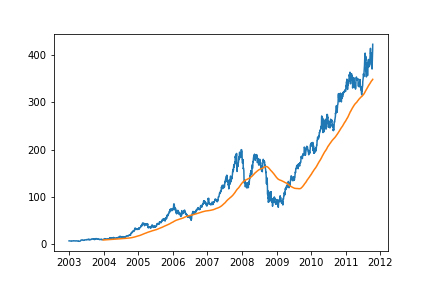

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(close_px['AAPL'])
ax.plot(close_px['AAPL'].rolling(250).mean())

<IPython.core.display.Javascript object>


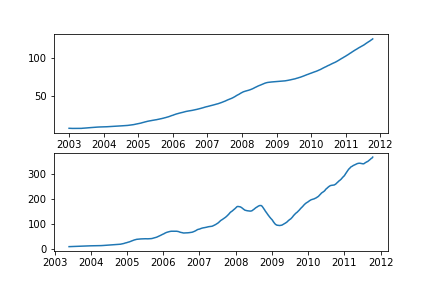

In [49]:
fig = plt.figure()
axe = fig.add_subplot(2,1,1)
axe.plot(close_px['AAPL'].expanding().mean())

axe = fig.add_subplot(2,1,2)
axe.plot(close_px['AAPL'].rolling(100).mean())

<IPython.core.display.Javascript object>


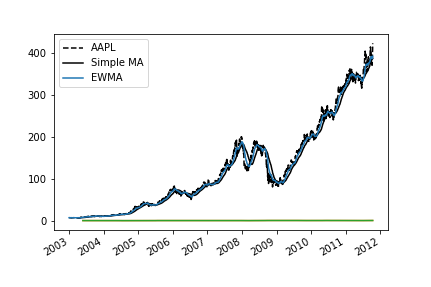

In [50]:
fig = plt.figure()
axe = fig.add_subplot(1,1,1)
aapl_px = close_px['AAPL']
ma60 = close_px['AAPL'].rolling(60).mean()
ewma60 = close_px['AAPL'].ewm(span=30).mean()
aapl_px.plot(style='k--')
ma60.plot(style='k-',label='Simple MA')
ewma60.plot(label='EWMA')
plt.legend()

In [57]:
ewma60

2003-01-02      7.400000
2003-01-03      7.425833
2003-01-06      7.434432
2003-01-07      7.433211
2003-01-08      7.398351
                 ...    
2011-10-10    385.682936
2011-10-11    386.625327
2011-10-12    387.629499
2011-10-13    388.971467
2011-10-14    391.102340
Name: AAPL, Length: 2214, dtype: float64

In [59]:
ma60

2003-01-02           NaN
2003-01-03           NaN
2003-01-06           NaN
2003-01-07           NaN
2003-01-08           NaN
                 ...    
2011-10-10    384.402833
2011-10-11    384.844333
2011-10-12    385.266667
2011-10-13    385.625500
2011-10-14    386.204000
Name: AAPL, Length: 2214, dtype: float64

In [60]:
spx_px=close_px_all['SPX']

In [61]:
spx_rets = spx_px.pct_change()

In [62]:
returns = close_px.pct_change()

In [63]:
corr = returns['AAPL'].rolling(125,min_periods=100).corr(spx_rets)

<IPython.core.display.Javascript object>


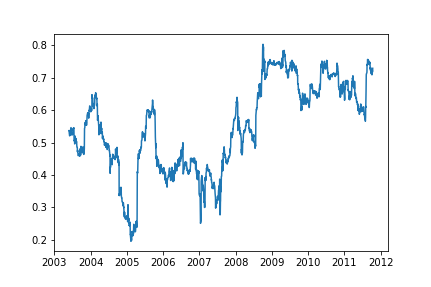

In [67]:
fig = plt.figure()
axe = fig.add_subplot(111)
axe.plot(corr)